## (1) Data Description:

In [2]:
#load necessary libraries
library(tidyverse)
library(repr)
library(tidymodels)

#load data into notebook
sessions <- read_csv("data/sessions.csv")
players <- read_csv("data/players.csv")

#summary statistics of sessions
head(sessions)

total_observations_sessions <- nrow(sessions) #total observations in dataset
total_observations_sessions

summary_stats_sessions <- sessions |>
        select(original_start_time, original_end_time) |>
        mutate(min_start_time = min(original_start_time, na.rm=TRUE)) |>
        mutate(max_start_time = max(original_start_time, na.rm=TRUE)) |>
        mutate(min_end_time = min(original_end_time, na.rm=TRUE)) |>
        mutate(max_end_time = max(original_end_time, na.rm=TRUE)) |>
        select(-original_start_time, -original_end_time) |>
        slice(1) |>
        round(2)
summary_stats_sessions


#Description of players.csv dataset follows
head(players)

total_observations_players <- nrow(players) #total observations in dataset
total_observations_players


#proportion of sbscribed players
subscribed <- players |>
        group_by(subscribe) |>
        summarize(count = n()) |>
        mutate(proportion = count /total_observations_players)
subscribed


#proportion of players of each experience level
experience <- players |>
        group_by(experience) |>
        summarize(count = n()) |>
        mutate(proportion = count /total_observations_players)
experience    


#proportion of players of each gender identity
gender <- players |>
        group_by(gender) |>
        summarize(count = n()) |>
        mutate(proportion = count /total_observations_players)
gender    


#Summary stats for Age and played_hours in a dataframe
summary_stats_players <- players |>
        select(played_hours, Age) |>
        mutate(max_age = max(Age, na.rm=TRUE)) |>
        mutate(mean_age = mean(Age, na.rm=TRUE)) |>
        mutate(min_age = min(Age, na.rm=TRUE)) |>
        mutate(max_hours_played = max(played_hours, na.rm=TRUE)) |>
        mutate(mean_hours_played = mean(played_hours, na.rm=TRUE)) |>
        mutate(min_hours_played = min(played_hours, na.rm=TRUE)) |>
        select(-Age, -played_hours) |>
        slice(1) |>
        round(2)
summary_stats_players


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


[1] 1535

min_start_time,max_start_time,min_end_time,max_end_time
<dbl>,<dbl>,<dbl>,<dbl>
1.7124e+12,1.72733e+12,1.7124e+12,1.72734e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196

subscribe,count,proportion
<lgl>,<int>,<dbl>
FALSE,52,0.2653061
TRUE,144,0.7346939


experience,count,proportion
<chr>,<int>,<dbl>
Amateur,63,0.32142857
Beginner,35,0.17857143
Pro,14,0.07142857
Regular,36,0.18367347
Veteran,48,0.24489796


gender,count,proportion
<chr>,<int>,<dbl>
Agender,2,0.010204082
Female,37,0.188775510
Male,124,0.632653061
Non-binary,15,0.076530612
Other,1,0.005102041
Prefer not to say,11,0.056122449
Two-Spirited,6,0.030612245


max_age,mean_age,min_age,max_hours_played,mean_hours_played,min_hours_played
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
58,21.14,9,223.1,5.85,0


#### Description of Sessions.csv 
This data set contains 5 columns and 1535 rows. There are 3 chr columns that contain the players' emails, as well as when each player started and ended their play session. There are also 2 columns that contain dbl data which are numeical representations of the start and end of each play session recorded in some way. I am not analyzing this dataset so the analysis will go no further than this. Still, in the code a few summary statistics for these variables are calculated. 

#### Description of Players.csv
This data set contains 7 columns and 196 rows. There are two dbl columns which contain data about player age and number of hours played. There are 4 chr columns that contain data about player experience, the players' emails, their names, and their genders. Finally, there is one lgl column that shows whether or not each player has described. Summary statistics are calculated in the above tables, as well as which proportions of the playerbase correspond to which gender, which experience level, and whether or not they have subsribed. One problem that may appear is the presence of NA observations, though as per the methods in chapter 5, we are well-equipped to deal with such observations. Class imbalance is also a potential issue, as the many more people are subscribed than are not. 



## (2) Questions:

#### Question 1 (Broad): What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

#### Question 2 (directed): Can the number of hours played and player age predict whether the player will subscribe in players.csv?
To answer this question, I will use the players.csv dataset. Specifically, I will need to standardize the data and then apply knn classification as we have learned to do throughout DSCI 100. After creating a classifier (using training data), I will need to use it to predict subsription status (on testing data) and then evaluate how well the classifier is able to do this in order to answer the question. 

## (3) Exploratory Data Analysis and Visualization

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


played_hours,Age
<dbl>,<dbl>
5.85,21.14


subscribe,count
<lgl>,<int>
FALSE,52
TRUE,144


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


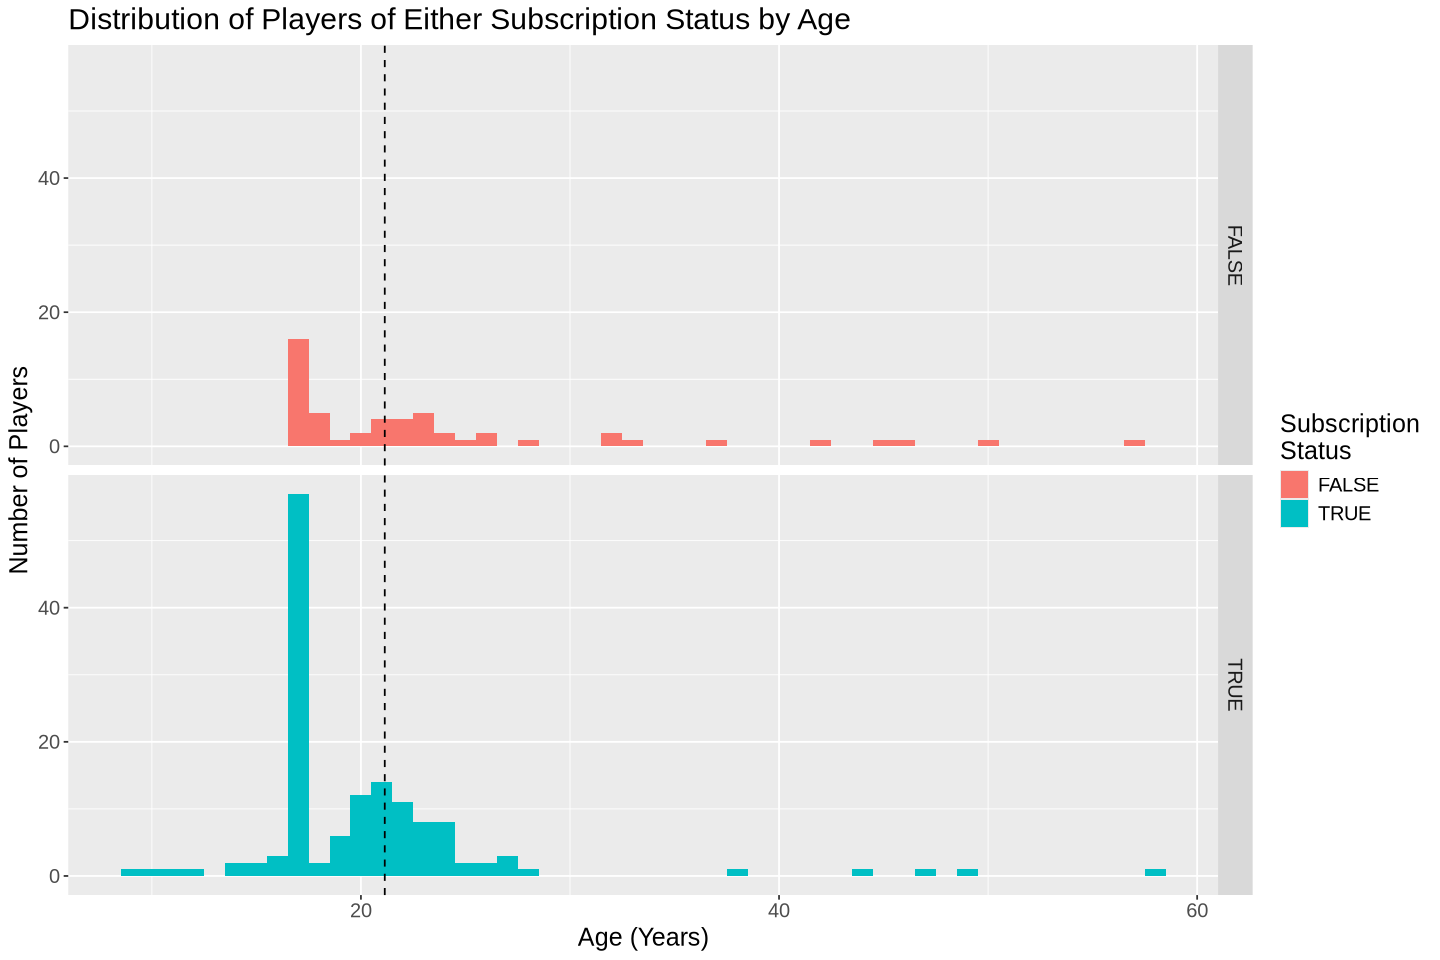

Warning message in scale_x_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


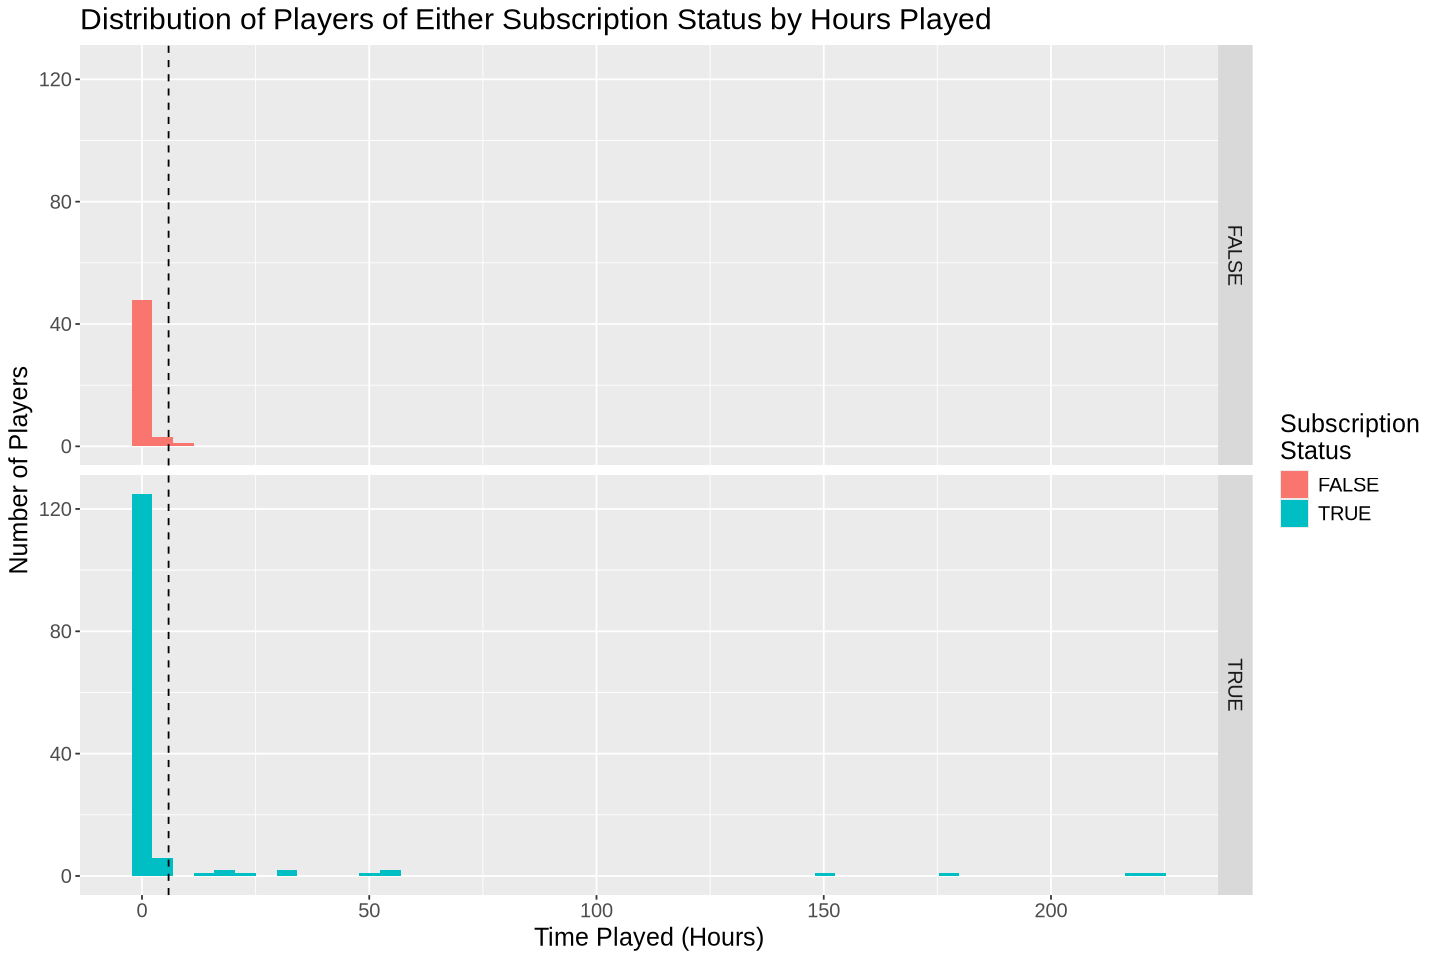

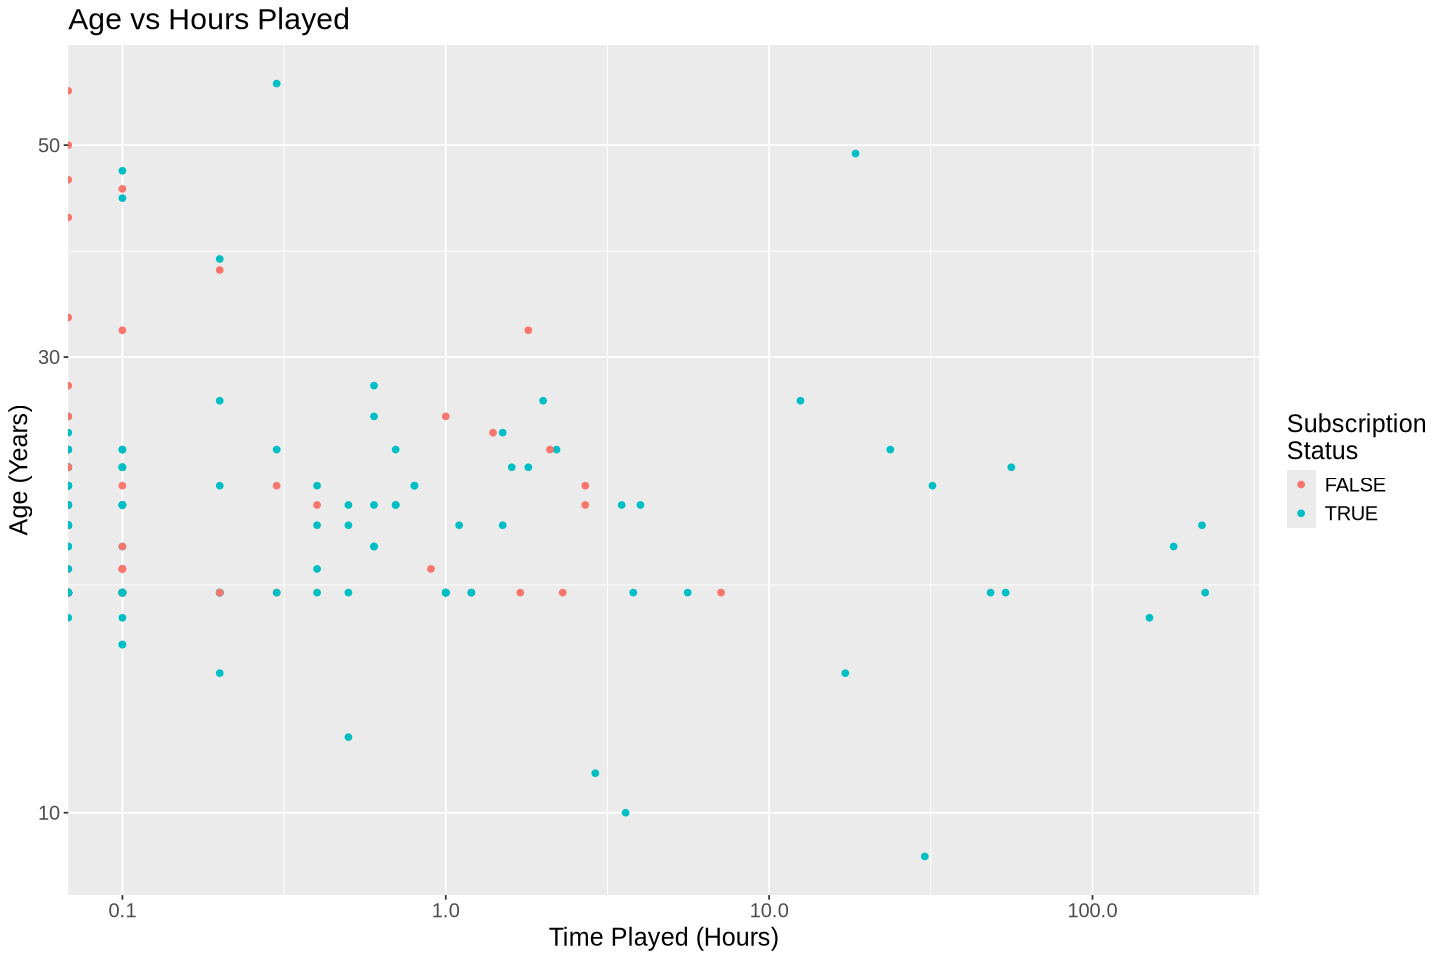

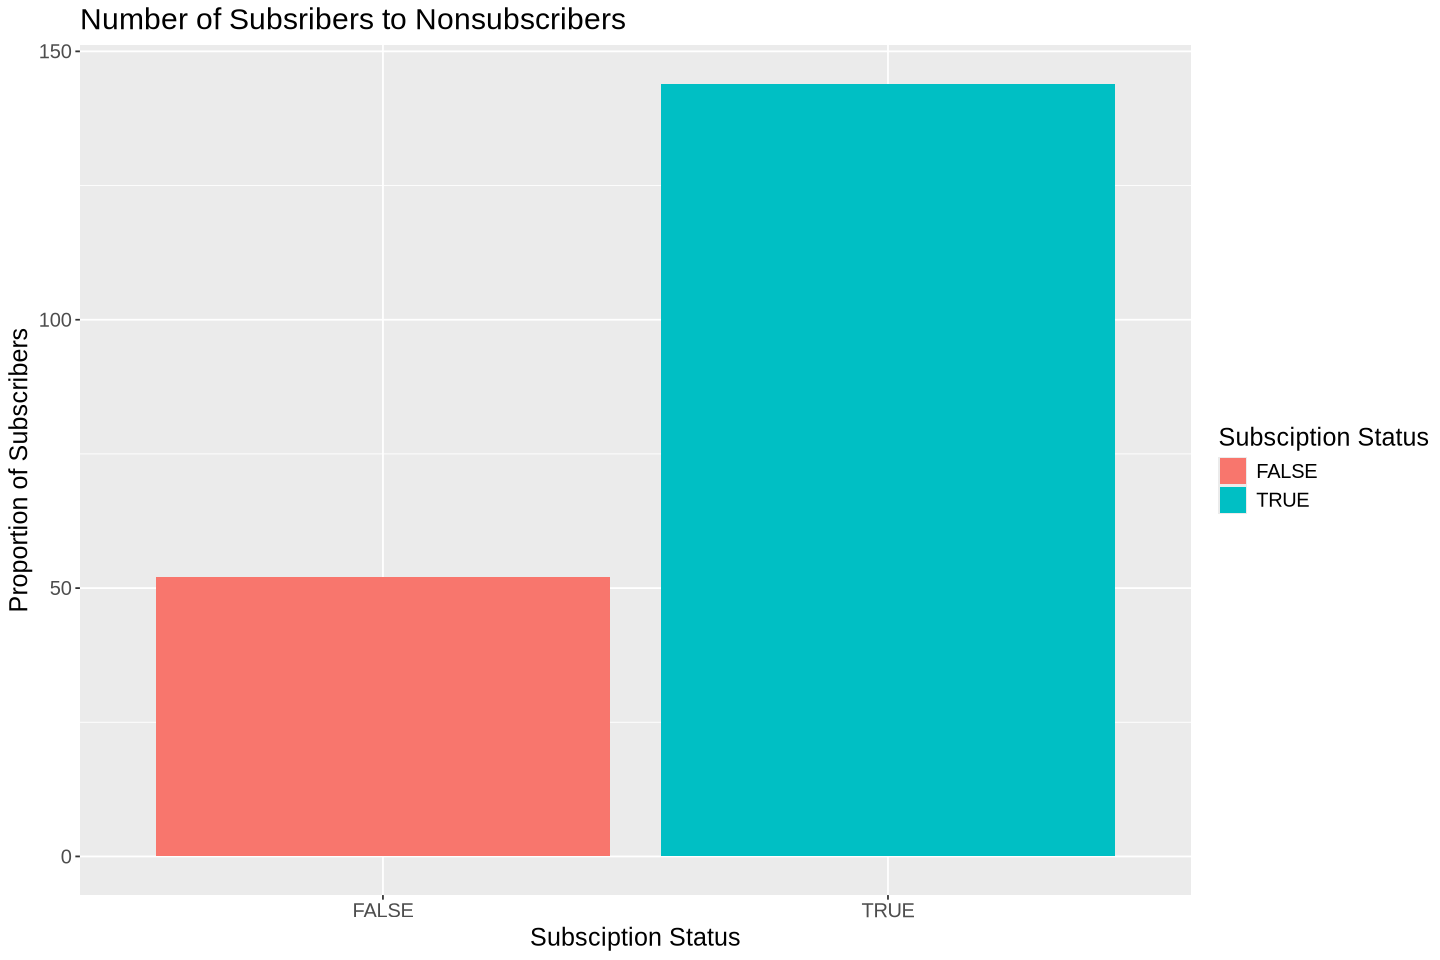

In [53]:
#as shown in (1) Data Description, the datasets can be loaded into R, and both datasets are already tidy
#For the rest of this analysis, I will use exclusively the players.csv dataset

head(players) 

#this table displays the mean values for played_hours and Age
players_mean_tbl <- players |>
        select(played_hours, Age) |>
        map_df(mean, na.rm=TRUE) |>
        round(2)
players_mean_tbl

subscriber_counts <- players |>
   group_by(subscribe) |>
   summarize(count = n()) 

subscriber_counts

#exploratory visualization 1
options(repr.plot.height = 8, repr.plot.width = 12)
ex_viz_1 <- ggplot(players, aes(x = Age, fill = subscribe)) +
        geom_histogram(bins = 50) +
        facet_grid(rows = vars(subscribe)) +
        geom_vline(xintercept = 21.14, linetype = "dashed")+
        labs(x = "Age (Years)", y = "Number of Players", fill = "Subscription \nStatus") +
        ggtitle("Distribution of Players of Either Subscription Status by Age") +
        theme(text = element_text(size = 15))
ex_viz_1        

#exploratory visualization 2 
options(repr.plot.height = 8, repr.plot.width = 12)
ex_viz_2 <- ggplot(players, aes(x = played_hours, fill = subscribe)) +
        geom_histogram(bins = 50) +
        facet_grid(rows = vars(subscribe)) +
        geom_vline(xintercept = 5.85, linetype = "dashed")+
        labs(x = "Time Played (Hours)", y = "Number of Players", fill = "Subscription \nStatus") +
        ggtitle("Distribution of Players of Either Subscription Status by Hours Played") +
        theme(text = element_text(size = 15))
ex_viz_2 

#exploratory visualization 3
ex_viz_3 <- ggplot(players, aes(x = played_hours, y = Age, colour = subscribe)) +
        geom_point() +
        labs(x = "Time Played (Hours)", y = "Age (Years)", colour = "Subscription\nStatus") +
        ggtitle("Age vs Hours Played") +
        theme(text = element_text(size = 15)) +
        scale_x_log10(labels = label_comma()) +
        scale_y_log10(labels = label_comma())
ex_viz_3 

#exploratory visualization 4
ex_viz_3 <- ggplot(subscriber_counts, aes(x = subscribe, y = count, fill = subscribe)) +
        geom_bar(stat = "identity") +
        labs(x = "Subsciption Status", y = "Proportion of Subscribers", fill= "Subsciption Status") +
        ggtitle("Number of Subsribers to Nonsubscribers") +
        theme(text = element_text(size = 15))
ex_viz_3 


### Exploratory Conclusions
Both datasets can be loaded into R and they are both already tidy, as per the rules from chapter 3 of the textbook. The mean values for the players.csv dataset are in the table below (as calculated via the above code):
| mean_hours_played| mean_age |
| -------- | ------- |
| 5.85   |	21.14 |

#### Conclusions From Exploratory Visualizations
Plot 1 shows that the majority of players, both subscribed and not, are clustered around the mean age. Plot 2 shows that the vast majority of players are clustered around the mean hours played. Plot 3 shows that there isn't a very strong relationship between played_hours and Age. Since knn performs worse when predictor variables are closely related, this doesn't pose a problem. Plot 4 shows that there is class imbalance for the observation we are trying to predict, subsription status (subscribe). This may pose a problem for knn analysis, as depending on the number of neighbours used, the classifier could incorrectly predict subscription status to be TRUE for the majority of observations as it is the most observed class. We must be wary of this. 

## (4) Methods and Plan

Further Analysis Here!